In [19]:
import os
import graphviz
import time

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from time import time
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, GridSearchCV

from utils import tree_to_csv, CSV_HEADER

CART_MODEL_CSV = os.path.join("./", "cart_model_mfcc.csv")
GRAPHVIZ_NAME = "cart_graph_mfcc"

### Extract the dataset from the .au csv files

In [20]:
print("Extracting dataset training set...")
dataset = '../../datasets/music_features_mfcc_train.csv'
musics_df = pd.read_csv(dataset, header=0)
# Get all style values
Y_train = musics_df["style"].values
# Get all features names
features_name = musics_df.columns.values[:-2]
# Get all features values
# musics_df = musics_df.drop('style', axis=1)
# musics_df = musics_df.drop('file_name', axis=1)
# X = musics_df.values
X_train = musics_df.loc[:, ~musics_df.columns.isin(['style', 'file_name'])].values
unique_label_names = np.unique(Y_train)

print("File contains {} unique_label_names: ".format(len(unique_label_names), unique_label_names))
print("File contains {} lines of {} data ".format(X_train.shape[0], X_train.shape[1]))

print("Extracting dataset testing set...")
dataset = '../../datasets/music_features_mfcc_test.csv'
musics_df = pd.read_csv(dataset, header=0)
# Get all style values
Y_test = musics_df["style"].values
# Get all features names
features_name = musics_df.columns.values[:-2]
# Get all features values
# musics_df = musics_df.drop('style', axis=1)
# musics_df = musics_df.drop('file_name', axis=1)
# X = musics_df.values
X_test = musics_df.loc[:, ~musics_df.columns.isin(['style', 'file_name'])].values
unique_label_names = np.unique(Y_test)

print("File contains {} unique_label_names: ".format(len(unique_label_names), unique_label_names))
print("File contains {} lines of {} data ".format(X_test.shape[0], X_test.shape[1]))

Extracting dataset training set...
File contains 10 unique_label_names: 
File contains 799 lines of 42 data 
Extracting dataset testing set...
File contains 10 unique_label_names: 
File contains 201 lines of 42 data 


# Simple Decision Tree

### Optimize model using Grid search and cross validation

In [21]:
print("Creating Decision Tree model...")
decision_tree_model = tree.DecisionTreeClassifier()

print("Training Decision Tree model using grid search and cross validation...")
max_depth_list = list(range(1,20))
max_depth_list.append(None)
param_grid = dict(max_depth= max_depth_list)

decision_tree_model = GridSearchCV(decision_tree_model, param_grid, cv=5, verbose=2, n_jobs=os.cpu_count()-1)
t_start = time()
decision_tree_model.fit(X_train, Y_train)
print("Training done in {}s".format(time()-t_start))

decision_tree_best_estimator = decision_tree_model.best_estimator_
print("Decision Tree best estimator found using grid search: {}".format(decision_tree_best_estimator))


Creating Decision Tree model...
Training Decision Tree model using grid search and cross validation...
Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END ........................................max_depth=1; total time=   0.0s
[CV] END ........................................max_depth=2; total time=   0.0s
[CV] END ........................................max_depth=2; total time=   0.0s[CV] END ........................................max_depth=1; total time=   0.0s

[CV] END ........................................max_depth=2; total time=   0.0s[CV] END ........................................max_depth=2; total time=   0.0s

[CV] END ........................................max_depth=1; total time=   0.0s
[CV] END ........................................max_depth=3; total time=   0.0s
[CV] END ........................................max_depth=3; total time=   0.0s[CV] END ........................................max_depth=3; total time=   0.0s[CV] END ..................

### Create the final model using the best estimator found

Creating final Decision Tree model...
Training final Decision Tree model...
	training done in 0.0395047664642334s
Testing final Decision Tree model...
              precision    recall  f1-score   support

       blues       0.47      0.38      0.42        21
   classical       0.80      0.80      0.80        20
     country       0.34      0.50      0.41        20
       disco       0.32      0.40      0.36        20
      hiphop       0.40      0.30      0.34        20
        jazz       0.41      0.35      0.38        20
       metal       0.78      0.70      0.74        20
         pop       0.70      0.70      0.70        20
      reggae       0.52      0.65      0.58        20
        rock       0.27      0.20      0.23        20

    accuracy                           0.50       201
   macro avg       0.50      0.50      0.49       201
weighted avg       0.50      0.50      0.49       201



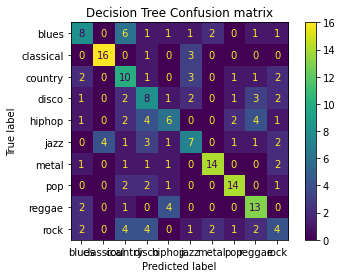

In [22]:
print("Creating final Decision Tree model...")
decision_tree_model = decision_tree_best_estimator
print("Training final Decision Tree model...")
t_start = time()
decision_tree_model.fit(X_train,Y_train)
print("\ttraining done in {}s".format(time()-t_start))

print("Testing final Decision Tree model...")
preds_valid=decision_tree_model.predict(X_test)
# Metrics off the dataset
print(classification_report(Y_test, preds_valid, target_names=unique_label_names))
# Plot confusion matrix
ConfusionMatrixDisplay.from_predictions(Y_test, preds_valid, display_labels=unique_label_names)
plt.title("Decision Tree Confusion matrix")
plt.show()
# plot_confusion_matrix(y_test_index, preds_valid_id, classes=unique_label_names, title='Decision Tree Confusion matrix')

### Export model results in a visual tree using graphviz

In [23]:
print("Using graphviz to export model results in a visual tree...")
dot_data = tree.export_graphviz(decision_tree_model, out_file=None, feature_names=features_name, class_names=unique_label_names, filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph.render(GRAPHVIZ_NAME)
print("DONE")

Using graphviz to export model results in a visual tree...
DONE


### Export model to csv file

In [24]:
print("CSV file  path: {}".format(CART_MODEL_CSV))
print("CSV file  header: {}".format(CSV_HEADER))
tree_to_csv(tree=decision_tree_model, class_names=unique_label_names, csv_file=CART_MODEL_CSV)

CSV file  path: ./cart_model_mfcc.csv
CSV file  header: ['node_id', 'threshold', 'feature_id', 'left_children_id', 'right_children_id', 'class']
